## Data Exploration

In [1]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import cross_validation, decomposition, grid_search

#allows the use of interactive inline plots
%matplotlib notebook

/Users/pratheerthpadman/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#loading the datasets

df_train = pd.read_csv('train_users_2.csv')
df_test = pd.read_csv('test_users.csv')
sessions = pd.read_csv('sessions.csv', header=0, index_col=False)

In [3]:
print "The Training dataset has {} samples and {} features".format(*df_train.shape)
print "The Testing dataset has {} samples and {} features".format(*df_test.shape)
print "The Sessions dataset has {} samples and {} features".format(*sessions.shape)

The Training dataset has 213451 samples and 16 features
The Testing dataset has 62096 samples and 15 features
The Sessions dataset has 10567737 samples and 6 features


In [4]:
df_train.T

,0,1,2,3,4,5,6,7,8,9,...,213441,213442,213443,213444,213445,213446,213447,213448,213449,213450
id,gxn3p5htnn,820tgsjxq7,4ft3gnwmtx,bjjt8pjhuk,87mebub9p4,osr2jwljor,lsw9q7uk0j,0d01nltbrs,a1vcnhxeij,6uh8zyj2gn,...,omlc9iku7t,rf0ay567js,0k26r3mir0,40o1ivh6cb,qbxza0xojf,zxodksqpep,mhewnxesx9,6o3arsjbb4,jh95kwisub,nw9fwlyb5f
date_account_created,2010-06-28,2011-05-25,2010-09-28,2011-12-05,2010-09-14,2010-01-01,2010-01-02,2010-01-03,2010-01-04,2010-01-04,...,2014-06-30,2014-06-30,2014-06-30,2014-06-30,2014-06-30,2014-06-30,2014-06-30,2014-06-30,2014-06-30,2014-06-30
timestamp_first_active,20090319043255,20090523174809,20090609231247,20091031060129,20091208061105,20100101215619,20100102012558,20100103191905,20100104004211,20100104023758,...,20140630235151,20140630235309,20140630235340,20140630235352,20140630235547,20140630235636,20140630235719,20140630235754,20140630235822,20140630235824
date_first_booking,NaN,NaN,2010-08-02,2012-09-08,2010-02-18,2010-01-02,2010-01-05,2010-01-13,2010-07-29,2010-01-04,...,2014-08-13,NaN,2014-07-13,NaN,2014-07-02,NaN,NaN,NaN,NaN,NaN
gender,-unknown-,MALE,FEMALE,FEMALE,-unknown-,-unknown-,FEMALE,FEMALE,FEMALE,-unknown-,...,FEMALE,-unknown-,FEMALE,-unknown-,FEMALE,MALE,-unknown-,-unknown-,-unknown-,-unknown-
age,NaN,38,56,42,41,NaN,46,47,50,46,...,34,NaN,36,NaN,23,32,NaN,32,NaN,NaN
signup_method,facebook,facebook,basic,facebook,basic,basic,basic,basic,basic,basic,...,basic,basic,basic,basic,basic,basic,basic,basic,basic,basic
signup_flow,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,25
language,en,en,en,en,en,en,en,en,en,en,...,en,en,en,en,en,en,en,en,en,en
affiliate_channel,direct,seo,direct,direct,direct,other,other,direct,other,other,...,direct,sem-brand,sem-brand,direct,sem-brand,sem-brand,direct,direct,other,direct


In [5]:
# Sorted destination country percentage table
dest_country_percentage = df_train['country_destination'].value_counts() * 100/len(df_train)
dest_country_percentage

NDF      58.347349
US       29.222632
other     4.728954
FR        2.353233
IT        1.328174
GB        1.088774
ES        1.053638
CA        0.669006
DE        0.497070
NL        0.356991
AU        0.252517
PT        0.101663
Name: country_destination, dtype: float64

In [6]:
# Age frequencies
df_train.age.value_counts(dropna = False)

NaN        87990
 30.0       6124
 31.0       6016
 29.0       5963
 28.0       5939
 32.0       5855
 27.0       5738
 33.0       5527
 26.0       5044
 34.0       5029
 35.0       4860
 25.0       4459
 36.0       4083
 37.0       3694
 38.0       3384
 24.0       3220
 39.0       2998
 40.0       2766
 41.0       2538
 23.0       2462
 42.0       2243
 45.0       2149
 44.0       2137
 43.0       2056
 46.0       1875
 22.0       1702
 47.0       1646
 48.0       1469
 50.0       1387
 51.0       1337
           ...  
 88.0         12
 97.0         10
 15.0          8
 2.0           7
 113.0         4
 4.0           3
 1949.0        3
 1931.0        3
 1932.0        3
 111.0         2
 1947.0        2
 1929.0        2
 1936.0        2
 1924.0        2
 1928.0        2
 1.0           2
 2008.0        1
 112.0         1
 132.0         1
 1925.0        1
 150.0         1
 1995.0        1
 1953.0        1
 1926.0        1
 1942.0        1
 1938.0        1
 1935.0        1
 1933.0       

In [7]:
sessions.head(5)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


## Exploratory Visualization

<IPython.core.display.Javascript object>


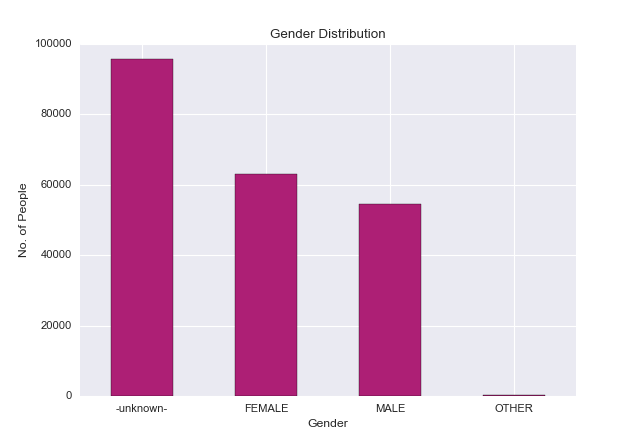

In [10]:
df_train.gender.value_counts(dropna=False).plot(kind='bar', color='#AD1F75', rot=0, title = 'Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('No. of People')

In [11]:
df_train.gender.value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

<IPython.core.display.Javascript object>


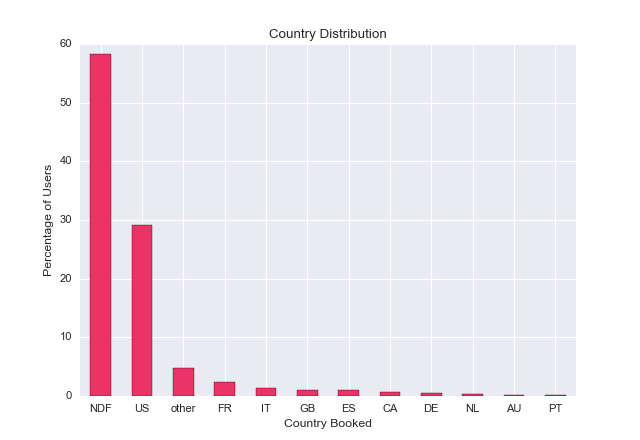

In [12]:
dest_country_percentage.plot(kind='bar', color ='#EC3365', rot=0, title = 'Country Distribution')
plt.xlabel('Country Booked')
plt.ylabel('Percentage of Users')

<IPython.core.display.Javascript object>


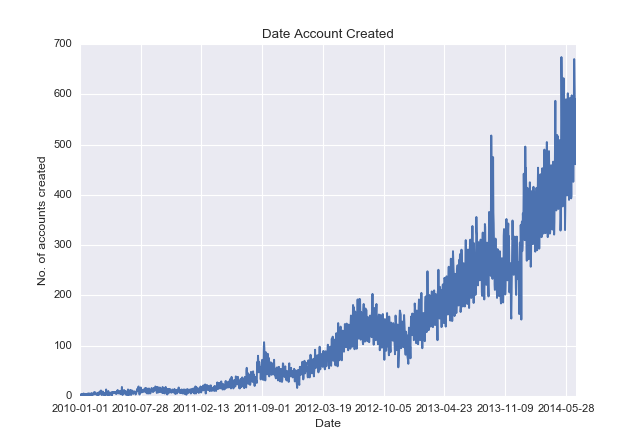

In [9]:
df_train.date_account_created.value_counts().sort_index().plot(title = 'Date Account Created')
plt.xlabel('Date')
plt.ylabel('No. of accounts created')

<IPython.core.display.Javascript object>


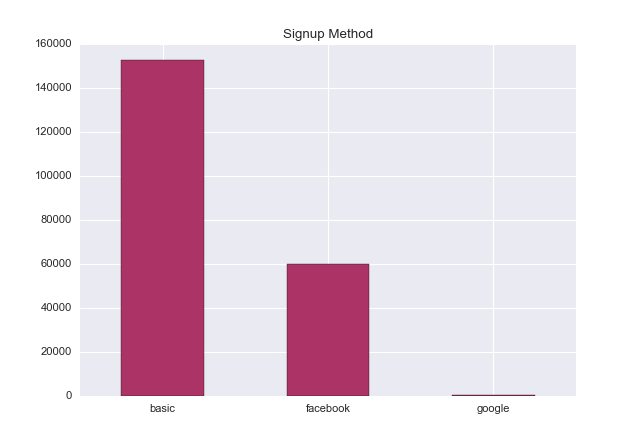

In [14]:
df_train.signup_method.value_counts().plot(kind = 'bar', rot = 0, color ='#AC3365', title = 'Signup Method')

## Data Preprocessing

In [8]:
# Combining the training and testing dataset

df_train_test = pd.concat((df_train, df_test), axis = 0, ignore_index=True)

In [9]:
# Changing the dates and timestamps into standard formats

df_train_test['date_account_created'] = pd.to_datetime(df_train_test['date_account_created'], format = '%Y-%m-%d')
df_train_test['timestamp_first_active'] = pd.to_datetime(df_train_test['timestamp_first_active'], format = '%Y%m%d%H%M%S')
df_train_test['date_account_created'].fillna(df_train_test.timestamp_first_active, inplace = True)

In [10]:
# Removing the date_first_booking column

df_train_test.drop('date_first_booking', axis=1, inplace=True)

In [11]:
# Function to remove outliers

def remove_outliers(df, column, min_val, max_val):
    column_val = df[column].values
    df[column] = np.where(np.logical_or(column_val<=min_val, column_val>=max_val), np.NaN, column_val)
    return df

# Removing outliers from age column

df_train_test = remove_outliers(df_train_test, 'age', 15, 95)

#Replacing NaN's with -1

df_train_test['age'].fillna(-1, inplace=True)

In [12]:
#Filling up the missing values in first_affiliate_tracked column with -1's

df_train_test['first_affiliate_tracked'].fillna(-1, inplace=True)

In [13]:
df_train_test.T

,0,1,2,3,4,5,6,7,8,9,...,275537,275538,275539,275540,275541,275542,275543,275544,275545,275546
affiliate_channel,direct,seo,direct,direct,direct,other,other,direct,other,other,...,direct,sem-brand,direct,direct,seo,direct,direct,direct,sem-brand,other
affiliate_provider,direct,google,direct,direct,direct,other,craigslist,direct,craigslist,craigslist,...,direct,google,direct,direct,yahoo,direct,direct,direct,google,other
age,-1,38,56,42,41,-1,46,47,50,46,...,-1,55,34,32,-1,31,-1,-1,-1,49
country_destination,NDF,NDF,US,other,US,US,US,US,US,US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_account_created,2010-06-28 00:00:00,2011-05-25 00:00:00,2010-09-28 00:00:00,2011-12-05 00:00:00,2010-09-14 00:00:00,2010-01-01 00:00:00,2010-01-02 00:00:00,2010-01-03 00:00:00,2010-01-04 00:00:00,2010-01-04 00:00:00,...,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00
first_affiliate_tracked,untracked,untracked,untracked,untracked,untracked,omg,untracked,omg,untracked,omg,...,untracked,omg,untracked,linked,linked,untracked,untracked,linked,omg,tracked-other
first_browser,Chrome,Chrome,IE,Firefox,Chrome,Chrome,Safari,Safari,Safari,Firefox,...,-unknown-,Firefox,Chrome,Chrome,Chrome,IE,-unknown-,Firefox,Safari,Chrome
first_device_type,Mac Desktop,Mac Desktop,Windows Desktop,Mac Desktop,Mac Desktop,Mac Desktop,Mac Desktop,Mac Desktop,Mac Desktop,Mac Desktop,...,iPhone,Windows Desktop,Mac Desktop,Windows Desktop,Windows Desktop,Windows Desktop,Android Phone,Windows Desktop,Mac Desktop,Windows Desktop
gender,-unknown-,MALE,FEMALE,FEMALE,-unknown-,-unknown-,FEMALE,FEMALE,FEMALE,-unknown-,...,-unknown-,MALE,-unknown-,MALE,-unknown-,-unknown-,-unknown-,-unknown-,-unknown-,FEMALE
id,gxn3p5htnn,820tgsjxq7,4ft3gnwmtx,bjjt8pjhuk,87mebub9p4,osr2jwljor,lsw9q7uk0j,0d01nltbrs,a1vcnhxeij,6uh8zyj2gn,...,u7lv3glv6y,o6ofmozucx,wcw7xggeqp,m22pw2pkxr,8yvhec201j,cv0na2lf5a,zp8xfonng8,fa6260ziny,87k0fy4ugm,9uqfg8txu3


## Data Transformation

In [16]:
df_train_test.T

,0,1,2,3,4,5,6,7,8,9,...,275537,275538,275539,275540,275541,275542,275543,275544,275545,275546
affiliate_channel,direct,seo,direct,direct,direct,other,other,direct,other,other,...,direct,sem-brand,direct,direct,seo,direct,direct,direct,sem-brand,other
affiliate_provider,direct,google,direct,direct,direct,other,craigslist,direct,craigslist,craigslist,...,direct,google,direct,direct,yahoo,direct,direct,direct,google,other
age,-1,38,56,42,41,-1,46,47,50,46,...,-1,55,34,32,-1,31,-1,-1,-1,49
country_destination,NDF,NDF,US,other,US,US,US,US,US,US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_account_created,2010-06-28 00:00:00,2011-05-25 00:00:00,2010-09-28 00:00:00,2011-12-05 00:00:00,2010-09-14 00:00:00,2010-01-01 00:00:00,2010-01-02 00:00:00,2010-01-03 00:00:00,2010-01-04 00:00:00,2010-01-04 00:00:00,...,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00
first_affiliate_tracked,untracked,untracked,untracked,untracked,untracked,omg,untracked,omg,untracked,omg,...,untracked,omg,untracked,linked,linked,untracked,untracked,linked,omg,tracked-other
first_browser,Chrome,Chrome,IE,Firefox,Chrome,Chrome,Safari,Safari,Safari,Firefox,...,-unknown-,Firefox,Chrome,Chrome,Chrome,IE,-unknown-,Firefox,Safari,Chrome
first_device_type,Mac Desktop,Mac Desktop,Windows Desktop,Mac Desktop,Mac Desktop,Mac Desktop,Mac Desktop,Mac Desktop,Mac Desktop,Mac Desktop,...,iPhone,Windows Desktop,Mac Desktop,Windows Desktop,Windows Desktop,Windows Desktop,Android Phone,Windows Desktop,Mac Desktop,Windows Desktop
gender,-unknown-,MALE,FEMALE,FEMALE,-unknown-,-unknown-,FEMALE,FEMALE,FEMALE,-unknown-,...,-unknown-,MALE,-unknown-,MALE,-unknown-,-unknown-,-unknown-,-unknown-,-unknown-,FEMALE
id,gxn3p5htnn,820tgsjxq7,4ft3gnwmtx,bjjt8pjhuk,87mebub9p4,osr2jwljor,lsw9q7uk0j,0d01nltbrs,a1vcnhxeij,6uh8zyj2gn,...,u7lv3glv6y,o6ofmozucx,wcw7xggeqp,m22pw2pkxr,8yvhec201j,cv0na2lf5a,zp8xfonng8,fa6260ziny,87k0fy4ugm,9uqfg8txu3


In [18]:
# Function for one-hot-encoding

def convert_cols_binary(df, col_to_convert):
    categories = list(df[col_to_convert].drop_duplicates())
    
    for category in categories:
        cat_name = str(category).replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_").replace("-", "").lower()
        col_name = col_to_convert[:5] + '_' + cat_name[:10]
        df[col_name] = 0
        df.loc[(df[col_to_convert] == category), col_name] = 1
    
    return df


In [19]:
# OHE

col_to_convert = ['gender', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']

for col in col_to_convert:
    df_train_test = convert_cols_binary(df_train_test, col)
    df_train_test.drop(col, axis=1, inplace=True)

In [17]:
df_train_test.T

,0,1,2,3,4,5,6,7,8,9,...,275537,275538,275539,275540,275541,275542,275543,275544,275545,275546
age,-1,38,56,42,41,-1,46,47,50,46,...,-1,55,34,32,-1,31,-1,-1,-1,49
country_destination,NDF,NDF,US,other,US,US,US,US,US,US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_account_created,2010-06-28 00:00:00,2011-05-25 00:00:00,2010-09-28 00:00:00,2011-12-05 00:00:00,2010-09-14 00:00:00,2010-01-01 00:00:00,2010-01-02 00:00:00,2010-01-03 00:00:00,2010-01-04 00:00:00,2010-01-04 00:00:00,...,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00,2014-09-30 00:00:00
id,gxn3p5htnn,820tgsjxq7,4ft3gnwmtx,bjjt8pjhuk,87mebub9p4,osr2jwljor,lsw9q7uk0j,0d01nltbrs,a1vcnhxeij,6uh8zyj2gn,...,u7lv3glv6y,o6ofmozucx,wcw7xggeqp,m22pw2pkxr,8yvhec201j,cv0na2lf5a,zp8xfonng8,fa6260ziny,87k0fy4ugm,9uqfg8txu3
timestamp_first_active,2009-03-19 04:32:55,2009-05-23 17:48:09,2009-06-09 23:12:47,2009-10-31 06:01:29,2009-12-08 06:11:05,2010-01-01 21:56:19,2010-01-02 01:25:58,2010-01-03 19:19:05,2010-01-04 00:42:11,2010-01-04 02:37:58,...,2014-09-30 23:47:03,2014-09-30 23:47:51,2014-09-30 23:49:04,2014-09-30 23:50:00,2014-09-30 23:50:19,2014-09-30 23:52:32,2014-09-30 23:53:06,2014-09-30 23:54:08,2014-09-30 23:54:30,2014-09-30 23:59:01
gende_unknown,1,0,0,0,1,1,0,0,0,1,...,1,0,1,0,1,1,1,1,1,0
gende_male,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
gende_female,0,0,1,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
gende_other,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
signu_facebook,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Feature Engineering

In [18]:
#Creating new features from date and time fields

df_train_test['day_account_created'] = df_train_test['date_account_created'].dt.weekday
df_train_test['week_account_created'] = df_train_test['date_account_created'].dt.week
df_train_test['month_account_created'] = df_train_test['date_account_created'].dt.month
df_train_test['quarter_account_created'] = df_train_test['date_account_created'].dt.quarter
df_train_test['year_account_created'] = df_train_test['date_account_created'].dt.year
df_train_test['hour_first_active'] = df_train_test['timestamp_first_active'].dt.hour
df_train_test['day_first_active'] = df_train_test['timestamp_first_active'].dt.weekday
df_train_test['week_first_active'] = df_train_test['timestamp_first_active'].dt.week
df_train_test['month_first_active'] = df_train_test['timestamp_first_active'].dt.month
df_train_test['quarter_first_active'] = df_train_test['timestamp_first_active'].dt.quarter
df_train_test['year_first_active'] = df_train_test['timestamp_first_active'].dt.year
df_train_test['daystoactive_after_creation'] = (df_train_test['date_account_created'] - df_train_test['timestamp_first_active']).dt.days

# Dropping the now unneccessary columns

cols_to_drop = ['date_account_created', 'timestamp_first_active', 'country_destination']
for col in cols_to_drop:
    if col in df_train_test.columns:
        df_train_test.drop(col, axis=1, inplace=True)

In [19]:
#DETERMINING THE USER'S PRIMARY DEVICE

#filtering the required columns and rows
sessions_device = sessions.loc[:, ['user_id', 'device_type', 'secs_elapsed']]

#aggregating
aggregated_primary = sessions_device.groupby(['user_id', 'device_type'], as_index=False, sort=True).aggregate(np.sum)

#max value of secs_elapsed

idx = aggregated_primary.groupby(['user_id'], sort=False)['secs_elapsed'].transform(max) == aggregated_primary['secs_elapsed']

#dataframe for primary device
df_primary = pd.DataFrame(aggregated_primary.loc[idx, ['user_id', 'device_type', 'secs_elapsed']])

#renaming the columns
df_primary.rename(columns = {'device_type':'primary_device', 'secs_elapsed':'secs_on_primary_device'}, inplace=True)

#OHE
df_primary = convert_cols_binary(df_primary, 'primary_device')

#drop the original column
df_primary.drop('primary_device', axis=1, inplace=True)

In [20]:
df_primary.head()

,user_id,secs_on_primary_device,prima_iphone,prima_mac_deskto,prima_android_ap,prima_unknown,prima_windows_de,prima_ipad_table,prima_android_ph,prima_tablet,prima_linux_desk,prima_chromebook,prima_windows_ph,prima_blackberry,prima_ipodtouch,prima_opera_phon
1,00023iyk9l,572254.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0010k6l0om,586543.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,001wyh0pz8,282965.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0028jgx1x1,297010.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,002qnbzfs5,6283569.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# DETERMINING THE SECONDARY DEVICE

remaining = aggregated_primary.drop(aggregated_primary.index[idx])
idx = remaining.groupby(['user_id'], sort=False)['secs_elapsed'].transform(max) == remaining['secs_elapsed']
df_secondary = pd.DataFrame(remaining.loc[idx, ['user_id', 'device_type', 'secs_elapsed']])
df_secondary.rename(columns = {'device_type':'secondary_device', 'secs_elapsed':'secondary_secs'}, inplace=True)
df_secondary = convert_cols_binary(df_secondary, 'secondary_device')
df_secondary.drop('secondary_device', axis=1, inplace=True)


In [22]:
df_secondary.head(5)

,user_id,secondary_secs,secon_mac_deskto,secon_unknown,secon_android_ph,secon_windows_de,secon_tablet,secon_windows_ph,secon_iphone,secon_ipad_table,secon_linux_desk,secon_blackberry,secon_android_ap,secon_ipodtouch,secon_chromebook,secon_opera_phon
0,00023iyk9l,295642.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,002qnbzfs5,203511.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
11,00389675gq,236259.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
15,0057snrdpu,4268.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
17,005jc3nbmb,994093.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [23]:
# COMBINING DATASETS

#combining device datasets
df_primary.set_index('user_id', inplace=True)
df_secondary.set_index('user_id', inplace=True)
device_data = pd.concat([df_primary, df_secondary], axis=1, join="outer")

df_sessions = device_data.fillna(0)

# combining training,testing and sessions datasets
df_train_test.set_index('id', inplace=True)
df_train_test = pd.concat([df_train_test, df_sessions], axis=1, join ='inner')

In [24]:
df_sessions.head()

,secs_on_primary_device,prima_iphone,prima_mac_deskto,prima_android_ap,prima_unknown,prima_windows_de,prima_ipad_table,prima_android_ph,prima_tablet,prima_linux_desk,...,secon_tablet,secon_windows_ph,secon_iphone,secon_ipad_table,secon_linux_desk,secon_blackberry,secon_android_ap,secon_ipodtouch,secon_chromebook,secon_opera_phon
00023iyk9l,572254.0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0010k6l0om,586543.0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001wyh0pz8,282965.0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0028jgx1x1,297010.0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002qnbzfs5,6283569.0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [26]:
# Extracting training data for modelling

df_train.set_index('id', inplace=True)
df_train = pd.concat([df_train['country_destination'], df_train_test], axis=1, join='inner')

id_train = df_train.index.values
le = LabelEncoder()
y = le.fit_transform(df_train['country_destination'])
X = df_train.drop('country_destination', axis=1, inplace=False)

In [27]:
df_train.head()

,country_destination,age,gende_unknown,gende_male,gende_female,gende_other,signu_facebook,signu_basic,signu_google,signu_weibo,...,secon_tablet,secon_windows_ph,secon_iphone,secon_ipad_table,secon_linux_desk,secon_blackberry,secon_android_ap,secon_ipodtouch,secon_chromebook,secon_opera_phon
00023iyk9l,US,31.0,1,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001wyh0pz8,NDF,-1.0,1,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0028jgx1x1,NDF,-1.0,1,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002qnbzfs5,US,26.0,0,0,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0035hobuyj,US,-1.0,0,0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df_test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [29]:
# Fitting the classifier

XGB_model = xgb.XGBClassifier(objective='multi:softprob', subsample=0.5, colsample_bytree=0.5, seed=0)
param_grid = {'max_depth': [4, 5], 'learning_rate': [0.1, 0.3], 'n_estimators': [75, 100]}
model = grid_search.GridSearchCV(estimator=XGB_model, param_grid=param_grid, scoring='accuracy', verbose=10, n_jobs=1, iid=True, refit=True, cv=3)

model.fit(X, y)
print("Best score: %0.3f" % model.best_score_)
print("Best parameters set:")
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] n_estimators=75, learning_rate=0.1, max_depth=4 .................
[CV]  n_estimators=75, learning_rate=0.1, max_depth=4, score=0.653988 - 2.7min
[CV] n_estimators=75, learning_rate=0.1, max_depth=4 .................


[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:  2.7min


[CV]  n_estimators=75, learning_rate=0.1, max_depth=4, score=0.662633 - 2.8min
[CV] n_estimators=75, learning_rate=0.1, max_depth=4 .................
[CV]  n_estimators=75, learning_rate=0.1, max_depth=4, score=0.657207 - 3.0min
[CV] n_estimators=100, learning_rate=0.1, max_depth=4 ................
[CV]  n_estimators=100, learning_rate=0.1, max_depth=4, score=0.655268 - 4.1min
[CV] n_estimators=100, learning_rate=0.1, max_depth=4 ................


[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed: 12.5min


[CV]  n_estimators=100, learning_rate=0.1, max_depth=4, score=0.662715 - 3.9min
[CV] n_estimators=100, learning_rate=0.1, max_depth=4 ................
[CV]  n_estimators=100, learning_rate=0.1, max_depth=4, score=0.657289 - 4.0min
[CV] n_estimators=75, learning_rate=0.1, max_depth=5 .................
[CV]  n_estimators=75, learning_rate=0.1, max_depth=5, score=0.655020 - 3.7min
[CV] n_estimators=75, learning_rate=0.1, max_depth=5 .................


[Parallel(n_jobs=1)]: Done   7 tasks       | elapsed: 24.2min


[CV]  n_estimators=75, learning_rate=0.1, max_depth=5, score=0.662261 - 3.6min
[CV] n_estimators=75, learning_rate=0.1, max_depth=5 .................
[CV]  n_estimators=75, learning_rate=0.1, max_depth=5, score=0.657124 - 3.6min
[CV] n_estimators=100, learning_rate=0.1, max_depth=5 ................
[CV]  n_estimators=100, learning_rate=0.1, max_depth=5, score=0.654772 - 5.0min
[CV] n_estimators=100, learning_rate=0.1, max_depth=5 ................
[CV]  n_estimators=100, learning_rate=0.1, max_depth=5, score=0.661931 - 4.8min
[CV] n_estimators=100, learning_rate=0.1, max_depth=5 ................
[CV]  n_estimators=100, learning_rate=0.1, max_depth=5, score=0.657041 - 4.6min
[CV] n_estimators=75, learning_rate=0.3, max_depth=4 .................


[Parallel(n_jobs=1)]: Done  12 tasks       | elapsed: 45.8min


[CV]  n_estimators=75, learning_rate=0.3, max_depth=4, score=0.656011 - 2.9min
[CV] n_estimators=75, learning_rate=0.3, max_depth=4 .................
[CV]  n_estimators=75, learning_rate=0.3, max_depth=4, score=0.660402 - 3.0min
[CV] n_estimators=75, learning_rate=0.3, max_depth=4 .................
[CV]  n_estimators=75, learning_rate=0.3, max_depth=4, score=0.654150 - 3.1min
[CV] n_estimators=100, learning_rate=0.3, max_depth=4 ................
[CV]  n_estimators=100, learning_rate=0.3, max_depth=4, score=0.653864 - 4.1min
[CV] n_estimators=100, learning_rate=0.3, max_depth=4 ................
[CV]  n_estimators=100, learning_rate=0.3, max_depth=4, score=0.660278 - 4.1min
[CV] n_estimators=100, learning_rate=0.3, max_depth=4 ................


[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed: 63.0min


[CV]  n_estimators=100, learning_rate=0.3, max_depth=4, score=0.654769 - 4.1min
[CV] n_estimators=75, learning_rate=0.3, max_depth=5 .................
[CV]  n_estimators=75, learning_rate=0.3, max_depth=5, score=0.655598 - 3.8min
[CV] n_estimators=75, learning_rate=0.3, max_depth=5 .................
[CV]  n_estimators=75, learning_rate=0.3, max_depth=5, score=0.658337 - 3.7min
[CV] n_estimators=75, learning_rate=0.3, max_depth=5 .................
[CV]  n_estimators=75, learning_rate=0.3, max_depth=5, score=0.652828 - 3.7min
[CV] n_estimators=100, learning_rate=0.3, max_depth=5 ................
[CV]  n_estimators=100, learning_rate=0.3, max_depth=5, score=0.653203 - 5.0min
[CV] n_estimators=100, learning_rate=0.3, max_depth=5 ................
[CV]  n_estimators=100, learning_rate=0.3, max_depth=5, score=0.655157 - 5.0min
[CV] n_estimators=100, learning_rate=0.3, max_depth=5 ................
[CV]  n_estimators=100, learning_rate=0.3, max_depth=5, score=0.651630 - 5.0min


[Parallel(n_jobs=1)]: Done  24 tasks       | elapsed: 93.3min
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 93.3min finished


Best score: 0.658
Best parameters set:
	learning_rate: 0.1
	max_depth: 4
	n_estimators: 100


In [30]:
#Prediction

df_test.set_index('id', inplace=True)
df_test = pd.merge(df_test.loc[:,['date_first_booking']], df_train_test, how='left', left_index=True, right_index=True, sort=False)
X_test = df_test.drop('date_first_booking', axis=1, inplace=False)
X_test = X_test.fillna(-1)
id_test = df_test.index.values

y_pred = model.predict_proba(X_test)

In [31]:
#Taking the 5 classes with highest probabilities

ids = []  #list of ids
countries = []  #list of countries

for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 5
    countries += le.inverse_transform(np.argsort(y_pred[i])[::-1])[:5].tolist()

In [32]:
#Submission file

submission = pd.DataFrame(np.column_stack((ids, countries)), columns=['id', 'country'])
submission.to_csv('final_submission.csv', index=False)